#  Классификация kNN, парзеневские ядра.

## Инициализация данных

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
classification_problem = datasets.make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_classes=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [5]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=100)
    plt.show()

Alternative visualization problem

In [7]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=100)
    plt.show()

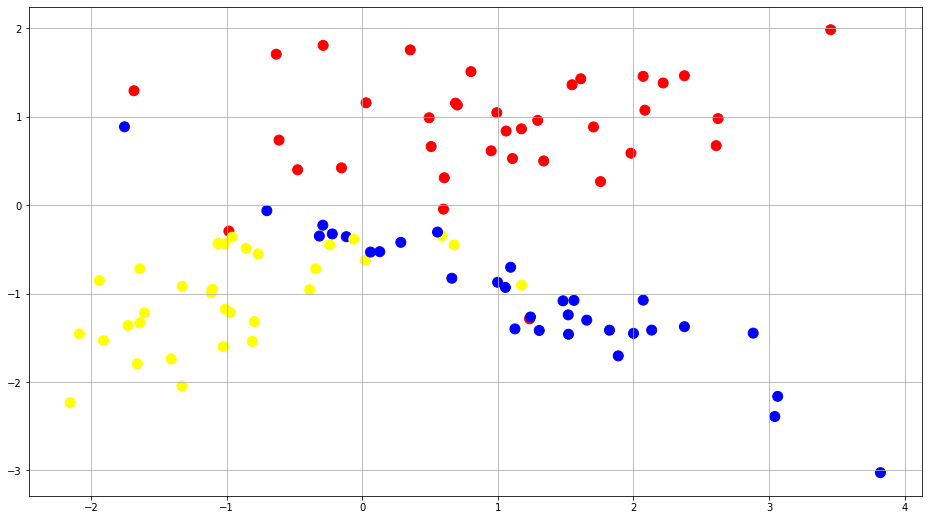

In [8]:
plot_dataset(classification_problem)

In [9]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size=0.4,
    random_state=1,
)

## kNN классификация

In [10]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.85

In [12]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [13]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1, 2, 2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

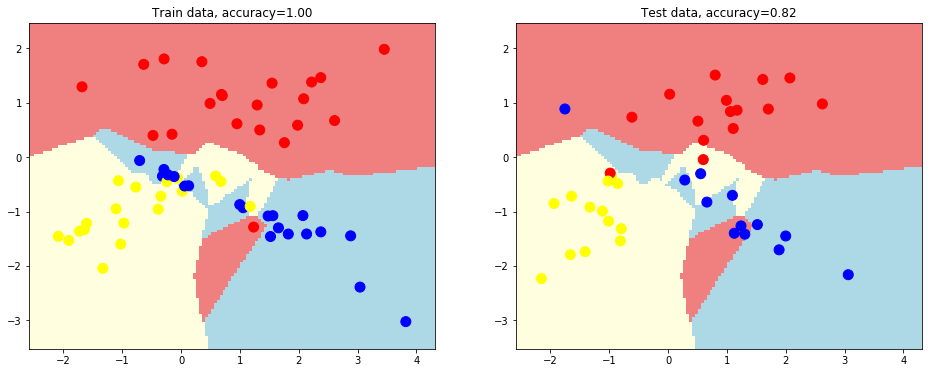

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [28]:
#scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')